In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
data=(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

First read the data

In [2]:
data=pd.read_csv("../input/heart.csv")

Make a quick overview of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


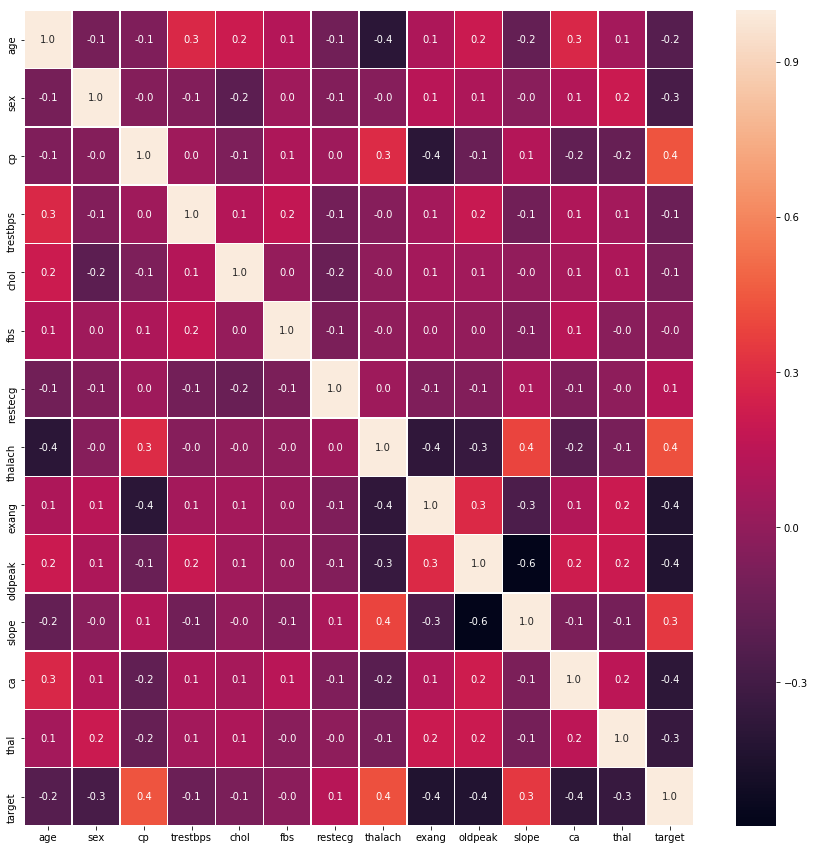

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Let's see the first 5 data


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
data.shape

(303, 14)

In [9]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [10]:
data.axes

[RangeIndex(start=0, stop=303, step=1),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object')]

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
data2=data.describe()
print(data2)

              age         sex     ...            thal      target
count  303.000000  303.000000     ...      303.000000  303.000000
mean    54.366337    0.683168     ...        2.313531    0.544554
std      9.082101    0.466011     ...        0.612277    0.498835
min     29.000000    0.000000     ...        0.000000    0.000000
25%     47.500000    0.000000     ...        2.000000    0.000000
50%     55.000000    1.000000     ...        2.000000    1.000000
75%     61.000000    1.000000     ...        3.000000    1.000000
max     77.000000    1.000000     ...        3.000000    1.000000

[8 rows x 14 columns]


In [13]:
print('std: ',data2.at['std','age'])

std:  9.082100989837858


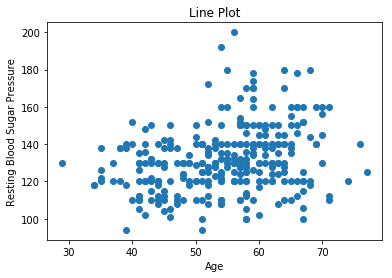

In [14]:
x_values=[item for item in data.age]

y_values=[item for item in data.trestbps]
   
    
plt.scatter(x_values,y_values)
plt.xlabel('Age')              # label = name of label
plt.ylabel('Resting Blood Sugar Pressure')
plt.title('Line Plot')            # title = title of plot
plt.show()

In [15]:
print(data['age'].value_counts(dropna =False))  #this shows how many times that age is repeated. 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


In [20]:
data3 = data.head(3)
data3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [25]:
melted = pd.melt(frame=data_new, value_vars= ['age','thalach'])
melted

,variable,value
0,age,63
1,age,37
2,age,41
3,thalach,150
4,thalach,187
5,thalach,172


In [28]:
melted.pivot(columns = 'variable',values='value')

variable,age,thalach
0,63.0,NaN
1,37.0,NaN
2,41.0,NaN
3,NaN,150.0
4,NaN,187.0
5,NaN,172.0


Concatenating

In [29]:
data_A=data.head(3)
data_B=data.tail(3)

conc_data_row = pd.concat([data_A,data_B],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
4,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
5,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [32]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
Data type can be converted as below:
    

In [35]:
data['age'] = data['age'].astype('float')
data.dtypes

age         float64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [56]:
print(data2)

              age         sex     ...            thal      target
count  303.000000  303.000000     ...      303.000000  303.000000
mean    54.366337    0.683168     ...        2.313531    0.544554
std      9.082101    0.466011     ...        0.612277    0.498835
min     29.000000    0.000000     ...        0.000000    0.000000
25%     47.500000    0.000000     ...        2.000000    0.000000
50%     55.000000    1.000000     ...        2.000000    1.000000
75%     61.000000    1.000000     ...        3.000000    1.000000
max     77.000000    1.000000     ...        3.000000    1.000000

[8 rows x 14 columns]


In [57]:
print(data2['age'])

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
